# Health Care 

## Project_03

In [1]:
# First importing the neccesary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Removing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the data set.
health_care = pd.read_excel("1645792390_cep1_dataset.xlsx")

### 1. Preliminary analysis:
#### a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [4]:
health_care.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
health_care.shape

(303, 14)

In [6]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking the missing values
health_care.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Checking the duplicate in the dataframe.
duplicate = health_care[health_care.duplicated(keep=False)]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [9]:
# Form above step its clear two rows are same so lets drop one of them. 
health_care.drop([164], axis=0, inplace=True)

In [10]:
duplicate1 = health_care[health_care.duplicated(keep=False)]
duplicate1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Now in the dataset there is no duplicate value as well there is no missing value in the dataset.

### 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:


#### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data


In [11]:
# Statistical summary of the data which help to measure the central tendencies and spread of data.
health_care.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#### b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

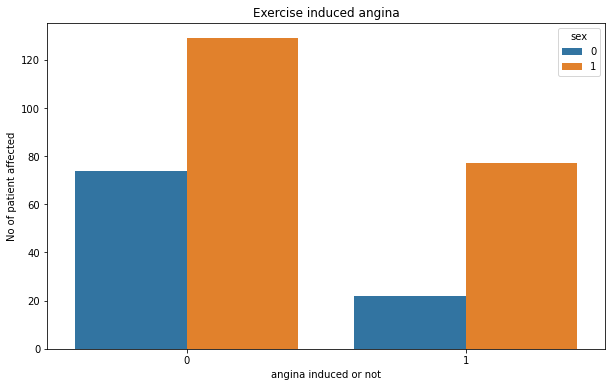

In [12]:
# Let's explore the variable which are categorical in nature by visualization.
plt.figure(figsize=(10,6))
sns.countplot(data=health_care, x='exang', hue= 'sex')
plt.xlabel('angina induced or not')
plt.ylabel('No of patient affected')
plt.title("Exercise induced angina")
plt.show()

The above plot show that angina pain induced due to exercise 1 show yes and 0 show No and its is differentiated with respect to gender.

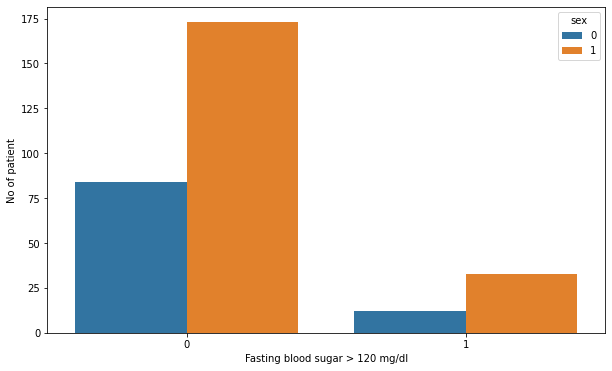

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=health_care, x='fbs', hue= 'sex')
plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('No of patient')
plt.show()

#### c. Study the occurrence of CVD across the Age category


In [14]:
# Now let's see CVD across the age category
CVD_wrt_age1 = health_care.groupby('age')['target'].sum()
CVD_wrt_age1

age
29     1
34     2
35     2
37     2
38     1
39     3
40     1
41     9
42     7
43     5
44     8
45     6
46     4
47     3
48     4
49     3
50     4
51     9
52     9
53     6
54    10
55     3
56     5
57     7
58     7
59     5
60     3
61     1
62     4
63     3
64     6
65     4
66     4
67     3
68     2
69     2
70     1
71     3
74     1
76     1
77     0
Name: target, dtype: int64

From above data we can see that occurrence of CVD with respect to the age. we can also say that most of the patient lie between the 50 to 60 age group. 

#### d. Study the composition of all patients with respect to the Sex category

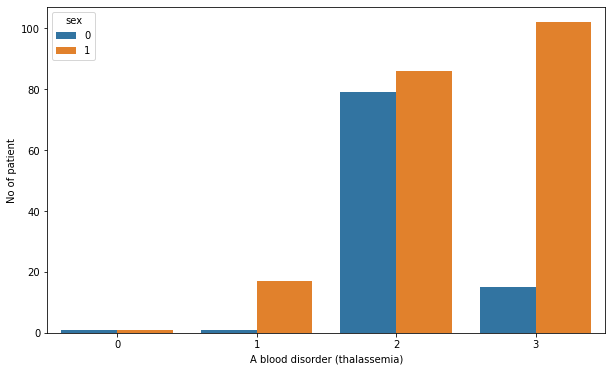

In [15]:
# With the help of the graph we will saw the composition.
plt.figure(figsize=(10,6))
sns.countplot(data=health_care, x='thal', hue= 'sex')
plt.xlabel('A blood disorder (thalassemia)')
plt.ylabel('No of patient')
plt.show()

Above graph show the blood disorder which related to blood flow. by this we get to know no of patient lie in which category.

#### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [16]:
trestbps_behaviour = pd.crosstab(health_care['trestbps'], health_care['target'], rownames=['resting blood pressure'], colnames=['heart attacks'])

In [17]:
trestbps_behaviour

heart attacks,0,1
resting blood pressure,,
94,0,2
100,2,2
101,0,1
102,0,2
104,0,1
105,0,3
106,0,1
108,2,4
110,11,8


As the 130 and 140 in not the resting blood pressure and more attacks case is at this bp level so its clear we can detect heart attacks on anomalies in the resting blood pressure.

#### f. Describe the relationship between cholesterol levels and a target variable

In [18]:
# With help of the correlation we will find the relationship between both.
Chol_target = health_care['chol'].corr(health_care['target'])

In [19]:
Chol_target

-0.08143720051844129

From above value it is clear that there is negative correlation between cholesterol and target variable.

#### g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [20]:
pd.crosstab(health_care['slope'], health_care['target'], rownames=['peak exercise slope'] , colnames= ['target'])

target,0,1
peak exercise slope,,
0,12,9
1,91,49
2,35,106


It is clear that larger slope lead chance of the heart attack.

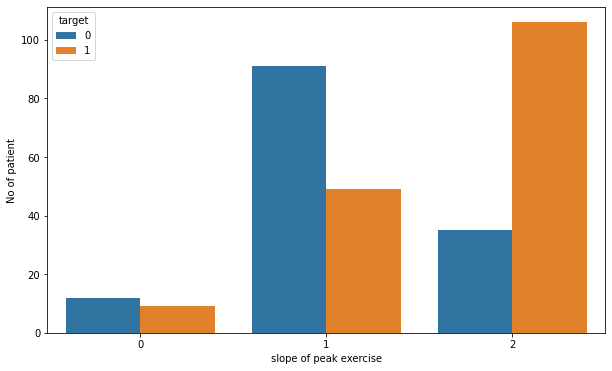

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=health_care, x='slope', hue='target')
plt.xlabel('slope of peak exercise')
plt.ylabel('No of patient')
plt.show()

#### h. Check if thalassemia is a major cause of CVD

In [22]:
Cause_detect = health_care.groupby('thal')['target'].sum()

In [23]:
Cause_detect

thal
0      1
1      6
2    129
3     28
Name: target, dtype: int64

From above data it is clear slightliy more then 50% of CVD due to thalassemia. so its moderatly affecting.

#### i. List how the other factors determine the occurrence of CVD

In [24]:
correlation = health_care.corr()['target'].sort_values(ascending=False)

In [25]:
correlation

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

Above values show correlation of CVD with the other feature by which we can see how other factor determine CVD.

#### j. Use a pair plot to understand the relationship between all the given variables

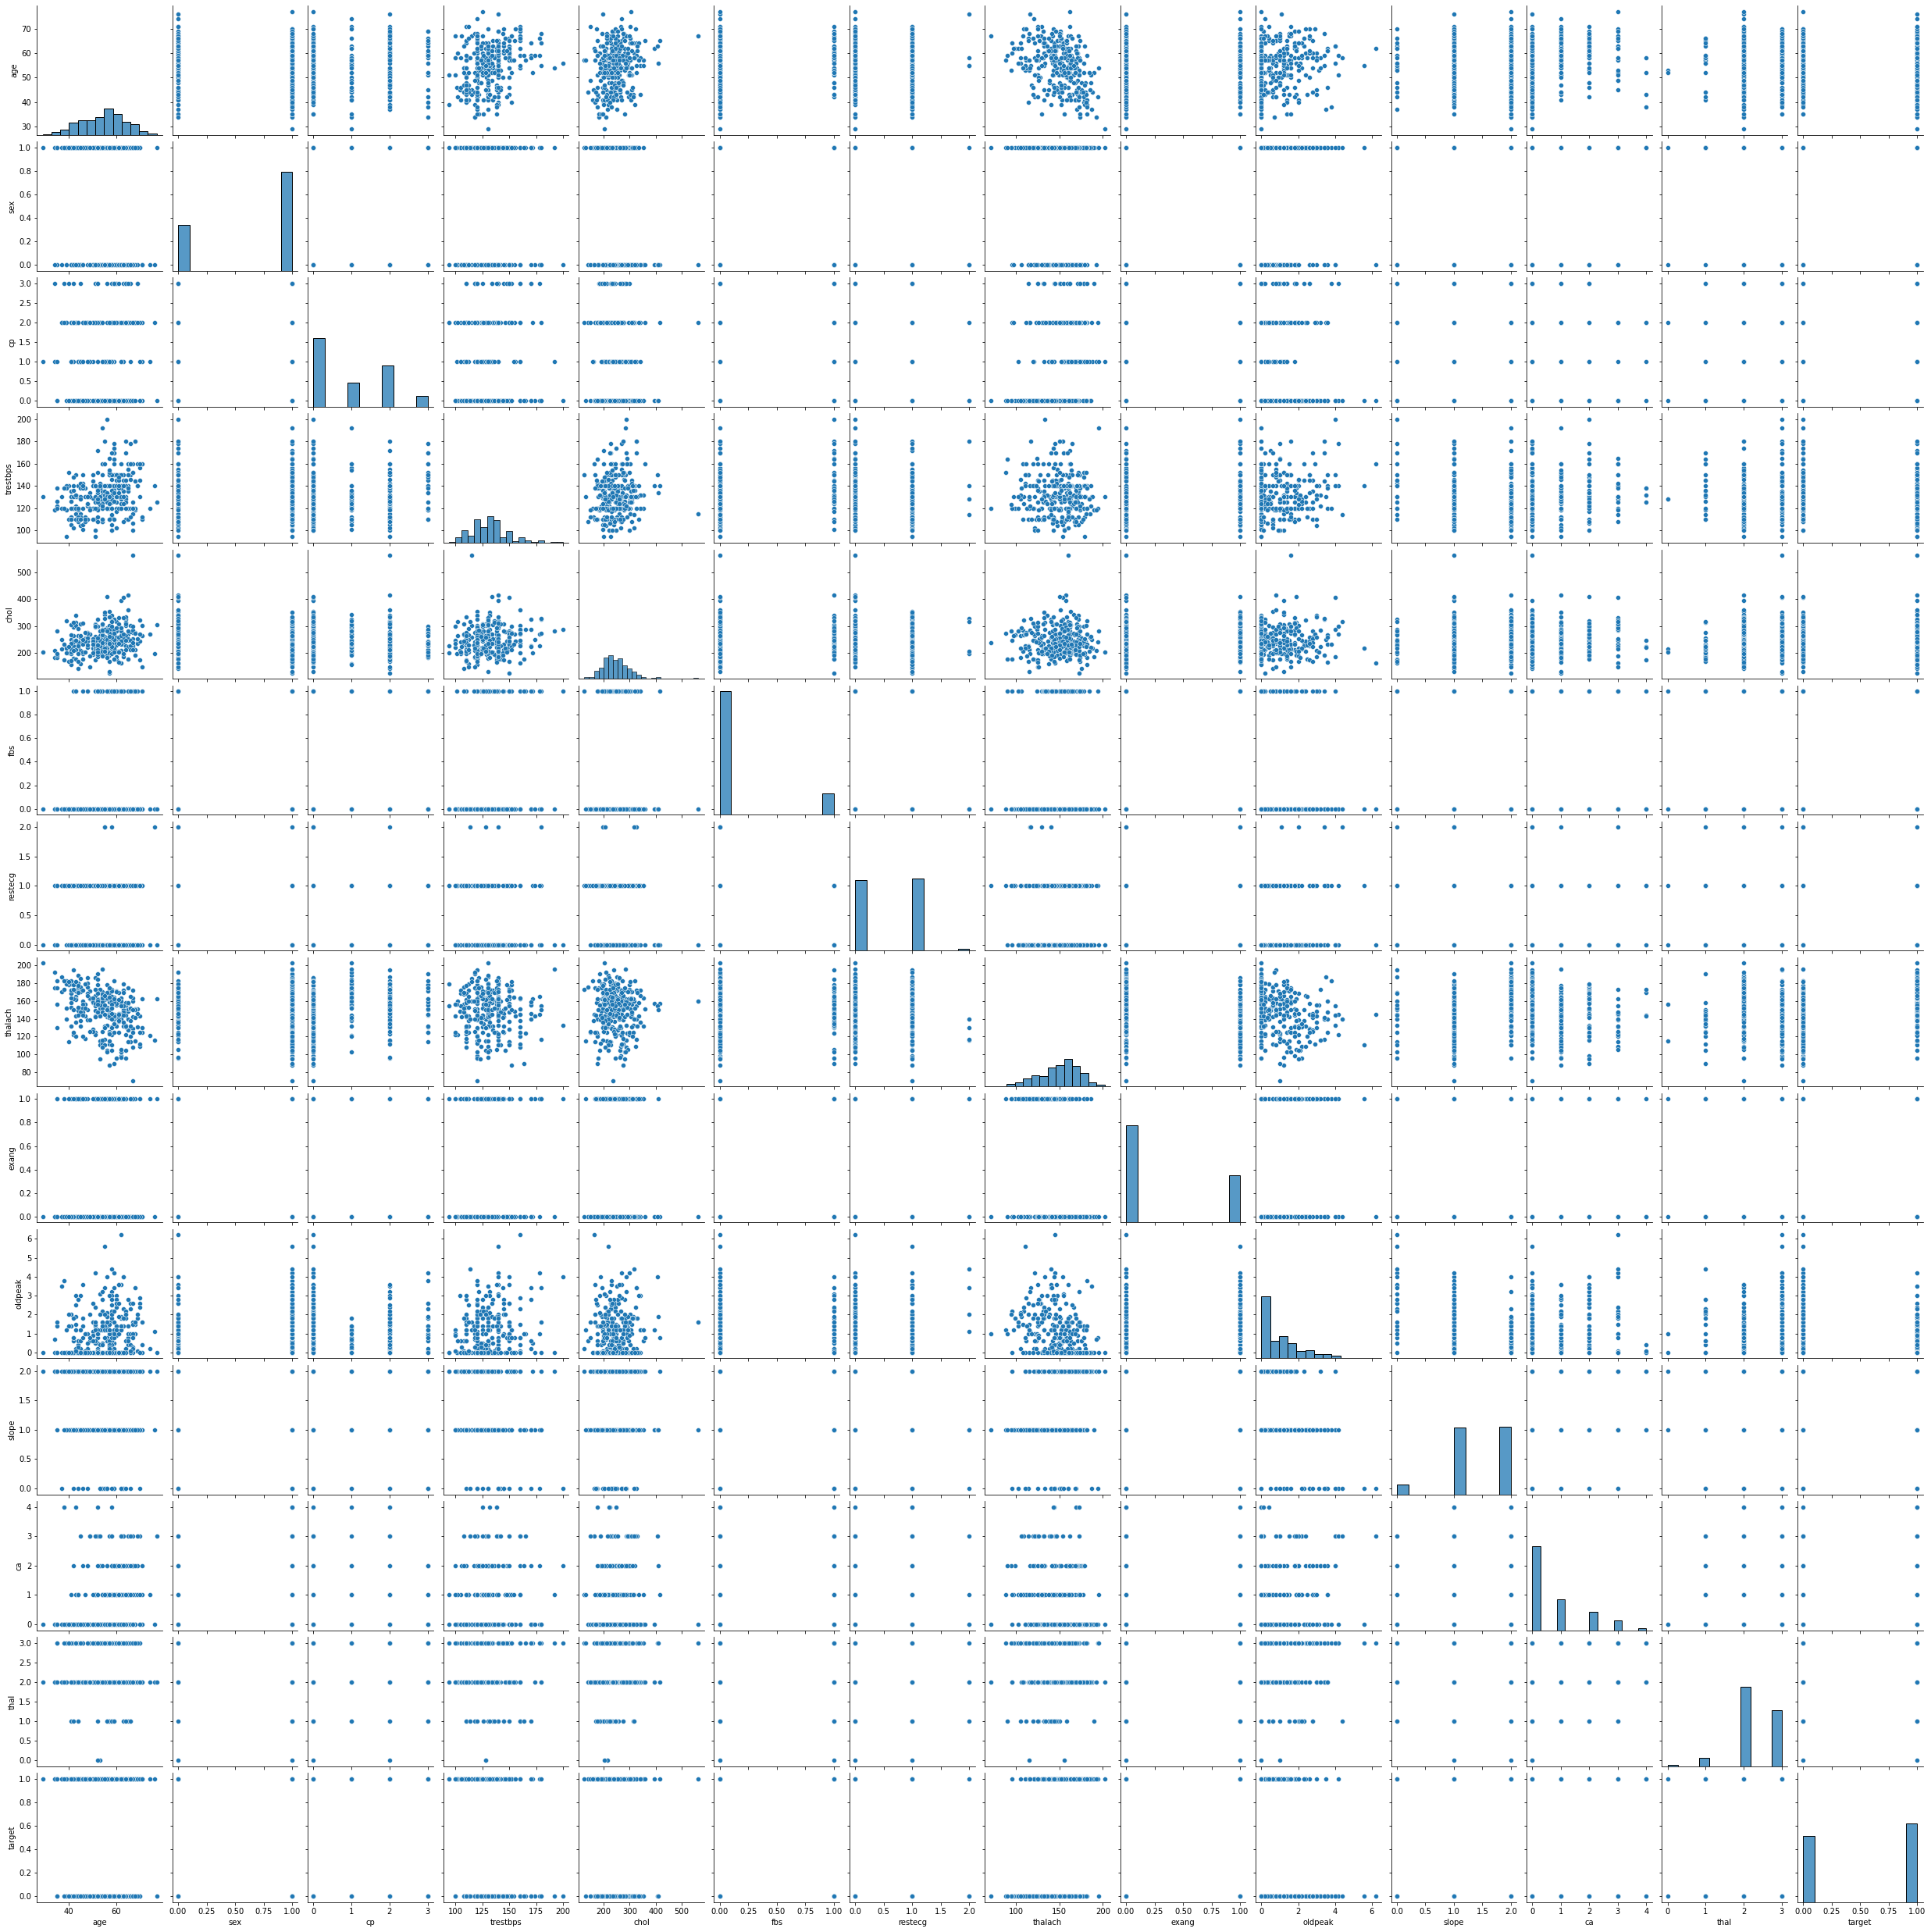

In [26]:
sns.pairplot(health_care)

### 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [27]:
# First building the GLM model for feature selection on the bases of p-values and std error.
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
formula = 'target ~ age+sex+cp+trestbps+chol+fbs+restecg+thalach+exang+oldpeak+slope+ca+thal'
model = smf.glm(formula = formula, data=health_care, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  302
Model:                            GLM   Df Residuals:                      288
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.18
Date:                Tue, 15 Nov 2022   Deviance:                       210.35
Time:                        00:23:06   Pearson chi2:                     274.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4946
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3042      2.578      1.282      0.2

In [33]:
# Now lets drop the feature which p-value is higher then 0.05
health_care.drop(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'slope'], axis=1, inplace=True)

In [35]:
x = health_care.drop('target', axis=1)
y = health_care['target']

In [42]:
# Now build the model 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=10)

#### Logestic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [50]:
lr.fit(x_train, y_train).score(x_train, y_train)

0.8630705394190872

In [51]:
y_pred = lr.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix  
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

from sklearn.metrics import classification_report
target_name  = ["yes", "No"]
print(classification_report(y_test, y_pred, target_names = target_name))

[[22 11]
 [ 3 25]]
              precision    recall  f1-score   support

         yes       0.88      0.67      0.76        33
          No       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



#### Random Forest Classifier

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier()

params = {'n_estimators': [100,200,300],
         'criterion': ['gini', 'entropy'],
         'max_depth': [3,4,5,6,10,15]}

model_cv = GridSearchCV(estimator=rfc,
                       param_grid=params,
                       scoring='f1',
                       cv = 5,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 10, 15],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='f1', verbose=1)

In [58]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 300}

In [59]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth=3, n_estimators= 300)

In [60]:
rfc.fit(x_train, y_train).score(x_train, y_train)

0.8755186721991701

In [61]:
pred = rfc.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix  
confusion_mat = confusion_matrix(y_test, pred)
print(confusion_mat)

from sklearn.metrics import classification_report
target_name  = ["yes", "No"]
print(classification_report(y_test, pred, target_names = target_name))

[[23 10]
 [ 1 27]]
              precision    recall  f1-score   support

         yes       0.96      0.70      0.81        33
          No       0.73      0.96      0.83        28

    accuracy                           0.82        61
   macro avg       0.84      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61

